해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

전통적으로 채무불이행 예측 모델은 다음과 같은 기본 알고리즘을 많이 사용함. 그 이유는 채무불이행 이유에 대한 '설명가능성'이 있기 때문 <br>
보수적인 금융권 특성, 고객과의 신뢰 등을 이유로 알고리즘의 설명 가능성에 대해 매우 민감함 <br>

In [4]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/Corona19_Classification_data.csv',encoding='cp949')

In [8]:
#불필요 컬럼 제거

In [9]:
len(df)

977390

In [10]:
len(df.columns)

63

In [11]:
#df.drocolumnsolumns=['Unnamed: 0', 'Unnamed: 0.1','생년월일'], inplace=True)

In [12]:
#df.info() #성별, 연체여부는 object로

성별, '범주형' 변수로 데이터타입을 int > object로 변환 <br>

In [13]:
df['성별']  = df['성별'].astype(str)

해당 데이터로 분류 모델링을 수행하기 위해서는 JOIN_KEY 속성이 배제돼야함

In [14]:
df_m = df.drop(columns=['JOIN_KEY'])


성별 변수 1: 남성<br>
성별 변수 2: 여성

In [15]:
df_m['성별'].unique()

array(['1', '2'], dtype=object)

In [16]:
df_m['성별'].head()

0    1
1    1
2    1
3    1
4    2
Name: 성별, dtype: object

해당 성별 변수를 one-hot 인코딩을 함 <br>
따라서 남성인 경우 1컬럼에 1, 여성인 경우 1컬럼에 0

In [17]:
sex_onehot = pd.get_dummies(df_m['성별'])

성별 카테고리는 남성 or 여성 딱 2가지이므로 한열에 모든 정보가 담겨있음 <br>
해당 내용과 동일하게 남성은 0, 여성은 1로 표현하기 위해 마지막 항목만 남겨둠

In [18]:
df_m['성별'].head()

0    1
1    1
2    1
3    1
4    2
Name: 성별, dtype: object

In [19]:
sex_onehot.head()

,1,2
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


 * 즉 남성인 경우 0, 여성인 경우 1

In [20]:
sex_onehot.drop(columns=['1'], inplace=True)

In [21]:
sex_onehot = sex_onehot.rename(columns={'2':'성별'})

In [22]:
df_m.drop(columns=['성별'], inplace = True)

In [23]:
df_m = pd.concat([df_m, sex_onehot], axis=1)

In [25]:
df_m['성별'] = df_m['성별'].astype(int)
df_m.drop(columns=['생년월일'], inplace=True)

In [26]:
len(df_m)

977390

In [27]:
len(df_m.columns)

61

In [28]:
945081*68

64265508

1. Train - Test Split
2. 채무불이행여부 (종속변수) OverSampling
3. GridSearchCV 
4. 여러가지 모델 생성 <br>
1) Decision Tree(공통), Logistic Regression(공통), RandomForest (책) 
  <br> 2) RNN, SVM (논문) 
  <br> 3) XGBoost, LigthGBM, 딥러닝, 등 (과거 플젝)

In [29]:
#연체여부 종속변수는 int로 변환
df_m['연체여부'] = df_m['연체여부'].map({'0':0,"b'1'":1})

In [30]:
#필요 라이브러리
import pandas as pd
import numpy as np

#################### Train_Test Split ######################
from sklearn.model_selection import train_test_split


#################### 성능평가 ############################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import sklearn
#################### XGBoost ###########################
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV


################## lgbm ###########################
from lightgbm import LGBMClassifier

##################### Decision Tree #######################
from sklearn.tree import DecisionTreeClassifier

################## RandomForest ##########################
from sklearn.ensemble import RandomForestClassifier

###################### Logistic Rregression ###############
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [31]:
#모델 성능 평가 함수화
def model_assessment(test,pred):
    confusion = confusion_matrix(test, pred)
    accuracy = accuracy_score(test,pred)
    report = metrics.classification_report(test, pred, digits=2)
    
    print('accuracy', accuracy, '\n')
    print('confusion_matrix',confusion, '\n')
    print(report)

In [32]:
len(df_m.columns)

61

# 1. Train - Test Split

해당 데이터에서 정상인 케이스 비율이 전체의 약 99.65%, 채무불이행(연체)가 약 0.35%임

In [33]:
df_m['연체여부'].value_counts() / df_m['연체여부'].value_counts().sum() *100

0    99.647121
1     0.352879
Name: 연체여부, dtype: float64

Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

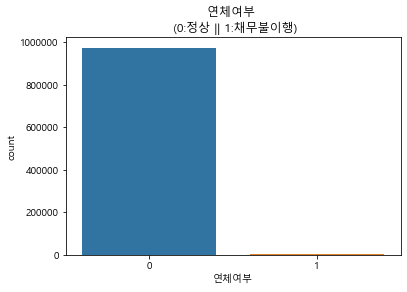

In [34]:
sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

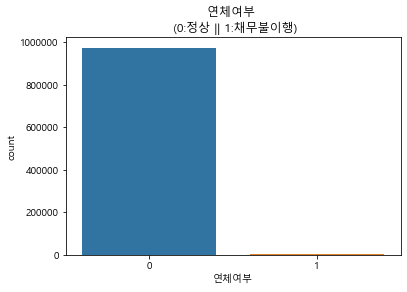

In [32]:
ax = sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')
fig = ax.get_figure()
plt.show()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png//Class Distribution')

In [35]:
#독립변수
X = df_m.drop(columns=['연체여부'])
y = df_m['연체여부']

* Random State seed 주는 것 보류

In [36]:
#stratify = y는 클래스 비율을 유지 즉 위의 0: 97.53 %  || 1: 2.47% 비율을 Train-Test에도 동일 적용

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=156)
print(X_train.shape, X_test.shape)

(684173, 60) (293217, 60)


In [37]:
y_train.value_counts() / y_train.value_counts().sum() *100

0    99.647165
1     0.352835
Name: 연체여부, dtype: float64

In [38]:
y_test.value_counts() / y_test.value_counts().sum() *100

0    99.647019
1     0.352981
Name: 연체여부, dtype: float64

In [39]:
#.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_test.csv')

In [40]:
#y_test.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_test.csv')

In [41]:
#X_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_train.csv')

In [42]:
#y_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_train.csv')

## 3. SMOTE OverSampling

Train Data Set에 대하여 Smote OverSampling 실행

원래 아이디어는 smote -> undersampling 해서 모델링 시간을 줄이려했지만...

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7) # RandomState 변경
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [44]:
print('SMOTE 적용 후 Data Set Size', X_train_over.shape, y_train_over.shape)

SMOTE 적용 후 Data Set Size (1363518, 60) (1363518,)


In [45]:
print('SMOTE 적용 후 Class 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 후 Class 분포:
 1    681759
0    681759
Name: 연체여부, dtype: int64


Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

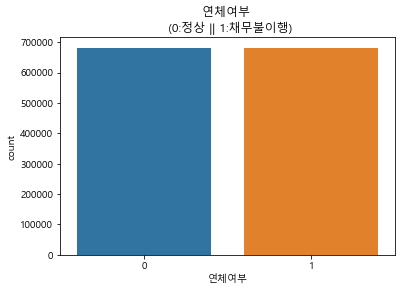

In [46]:
sns.countplot('연체여부', data = y_train_over.to_frame())
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

# Modelling

# 1. Regression

전통적으로 채무불이행 예측 모델은 다음과 같은 기본 알고리즘을 많이 사용함. 그 이유는 채무불이행 이유에 대한 '설명가능성'이 있기 때문 <br>
보수적인 금융권 특성, 고객과의 신뢰 등을 이유로 알고리즘의 설명 가능성에 대해 매우 민감함 <br>

## 1-1) Logistic

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(X_train_over,y_train_over)

LogisticRegression()

In [73]:
lr_pred = lr.predict(X_test)

In [47]:
model_assessment(y_test,lr_pred)

accuracy 0.7335079480384834 

confusion_matrix [[214282  77900]
 [   240    795]] 

              precision    recall  f1-score   support

           0       1.00      0.73      0.85    292182
           1       0.01      0.77      0.02      1035

    accuracy                           0.73    293217
   macro avg       0.50      0.75      0.43    293217
weighted avg       1.00      0.73      0.84    293217



In [7]:
def auc_return(y_test, pred):
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test,pred)
    auc = metrics.auc(fpr,tpr)
    return auc.round(2)

In [8]:
import pickle as pkl
with open('Logistc_Regression_predict.pkl','rb') as infile:
    lr_pred = pkl.load(infile)

FileNotFoundError: [Errno 2] No such file or directory: 'Logistc_Regression_predict.pkl'

In [55]:
auc = auc_return(y_test,lr_pred) # 변경
print(auc)

0.75


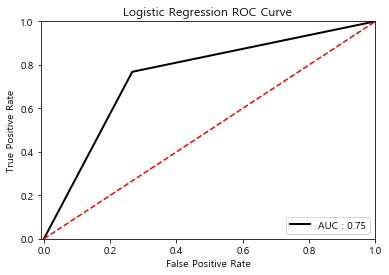

In [56]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, lr_pred)
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오0/png/Logistic Regression ROC.png')
plt.show()

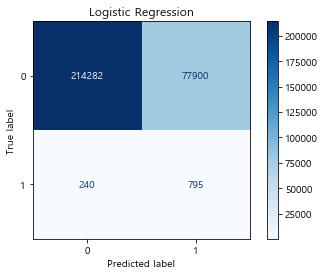

In [78]:
plot_confusion_matrix(lr,X_test,y_test,cmap='Blues')

plt.title('Logistic Regression')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오0/png/1.Logistic Regression Confusion Matrix.png')
plt.show()

In [ ]:
#모델저장
import pickle as pkl
with open("Logistc_Regression.pkl",'wb') as outfile:
    pkl.dump(lr,outfile)

In [82]:
#모델저장
import pickle as pkl
with open("Logistc_Regression_predict.pkl",'wb') as outfile:
    pkl.dump(lr_pred,outfile)

# 2. Classification

### 2-1) XGBOOST

In [51]:
#X_test.head()

In [58]:
#파라미터 조절,,,
xgb_over_model = XGBClassifier(n_estimators=100,
                              objective='binary:logistic',
                              seed=156,
                              learning_rate=0.01)
xgb_over_model.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.68893	validation_1-logloss:0.68793
[1]	validation_0-logloss:0.68220	validation_1-logloss:0.68280
[2]	validation_0-logloss:0.67844	validation_1-logloss:0.67756
[3]	validation_0-logloss:0.67257	validation_1-logloss:0.67267
[4]	validation_0-logloss:0.66692	validation_1-logloss:0.66807
[5]	validation_0-logloss:0.66308	validation_1-logloss:0.66316
[6]	validation_0-logloss:0.65775	validation_1-logloss:0.65815
[7]	validation_0-logloss:0.65416	validation_1-logloss:0.65371
[8]	validation_0-logloss:0.64892	validation_1-logloss:0.64915
[9]	validation_0-logloss:0.64508	validation_1-logloss:0.64474
[10]	validation_0-logloss:0.63964	validation_1-logloss:0.64054
[11]	validation_0-logloss:0.63647	validation_1-logloss:0.63614
[12]	validation_0-logloss:0.63130	validation_1-logloss:0.63210
[13]	validation_0-logloss:0.62796	validation_1-logloss:0.62818
[14]	validation_0-logloss:0.62293	validation_1-logloss:0.62404
[15]	validation_0-logloss:0.61959	validation_1-logloss:0.62029
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=156,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [57]:
xgb_over_pred = xgb_over_model.predict(X_test)

NameError: name 'xgb_over_model' is not defined

In [79]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.8063959456648148 

confusion_matrix [[235743  56439]
 [   329    706]] 

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    292182
           1       0.01      0.68      0.02      1035

    accuracy                           0.81    293217
   macro avg       0.51      0.74      0.46    293217
weighted avg       1.00      0.81      0.89    293217



In [64]:
#모델저장
import pickle as pkl
with open("xgboost_model.pkl",'wb') as outfile:
    pkl.dump(xgb_over_model,outfile)

In [66]:

import pickle as pkl
with open("xgboost_predict.pkl",'wb') as outfile:
    pkl.dump(xgb_over_pred,outfile)

In [80]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
auc = metrics.auc(fpr,tpr)
auc

0.7444808769677904

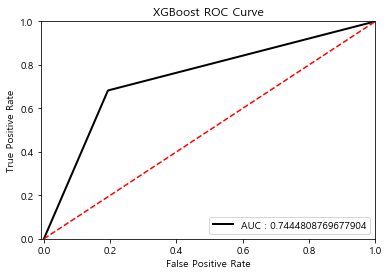

In [81]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오0/png/XGBoost ROC.png')
plt.show()

In [67]:
xgb_over_model.feature_importances_

array([1.5097462e-02, 4.8509305e-03, 4.4001299e-03, 1.1485882e-02,
       7.8531576e-04, 0.0000000e+00, 4.9765059e-03, 2.2204882e-03,
       2.8399585e-03, 7.8412211e-03, 4.1152490e-03, 2.0507129e-03,
       0.0000000e+00, 3.8256627e-03, 1.2603953e-02, 8.6514458e-02,
       0.0000000e+00, 4.9545192e-03, 1.0290329e-02, 0.0000000e+00,
       0.0000000e+00, 3.6119365e-03, 1.7776345e-03, 1.8483710e-02,
       1.1028977e-03, 4.7336319e-03, 9.1411872e-03, 0.0000000e+00,
       1.3974537e-03, 0.0000000e+00, 6.8540107e-03, 1.3439210e-02,
       3.5712731e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.0238373e-01, 2.2804955e-02, 2.4761921e-03, 0.0000000e+00,
       1.7784208e-03, 3.7857663e-04, 4.8619066e-03, 4.9419026e-03,
       3.4802915e-03, 0.0000000e+00, 7.8412530e-04, 3.0765457e-03,
       1.7710654e-03, 3.6839759e-03, 3.6894912e-03, 1.1250141e-02,
       1.8777272e-03, 1.3507985e-03, 0.0000000e+00, 1.9480353e-02,
       9.0062376e-03, 3.5061319e-03, 0.0000000e+00, 5.4451630e

In [ ]:
plot_confusion_matrix(xgb ######
                      X_test,y_test,cmap='Blues') 

plt.title('Logistic Regression')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오0/png/1.Logistic Regression Confusion Matrix.png')
plt.show()

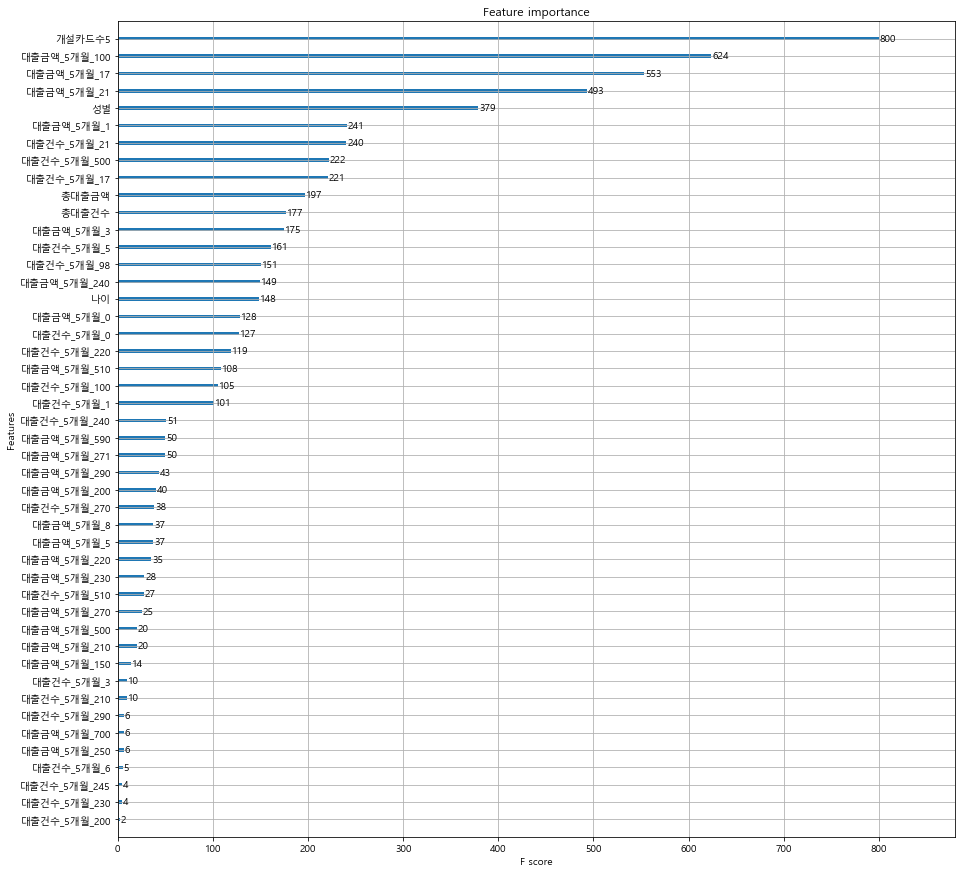

In [68]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_over_model.get_booster(), ax=ax)

## 2) LightGBM

In [84]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100)

In [85]:
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[1]	training's binary_logloss: 0.643545	valid_1's binary_logloss: 0.643895
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.602969	valid_1's binary_logloss: 0.604084
[3]	training's binary_logloss: 0.569532	valid_1's binary_logloss: 0.571573
[4]	training's binary_logloss: 0.540673	valid_1's binary_logloss: 0.543956
[5]	training's binary_logloss: 0.516273	valid_1's binary_logloss: 0.520995
[6]	training's binary_logloss: 0.494839	valid_1's binary_logloss: 0.500708
[7]	training's binary_logloss: 0.476584	valid_1's binary_logloss: 0.483728
[8]	training's binary_logloss: 0.459857	valid_1's binary_logloss: 0.468021
[9]	training's binary_logloss: 0.444335	valid_1's binary_logloss: 0.453287
[10]	training's binary_logloss: 0.431545	valid_1's binary_logloss: 0.441444
[11]	training's binary_logloss: 0.418736	valid_1's binary_logloss: 0.429012
[12]	training's binary_logloss: 0.409167	valid_1's binary_logloss: 0.420502
[13]	training's binary_logloss: 0.39

LGBMClassifier()

In [86]:
lgbm_pred = lgbm.predict(X_test)

In [87]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.9141761903300286 

confusion_matrix [[267674  24508]
 [   657    378]] 

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    292182
           1       0.02      0.37      0.03      1035

    accuracy                           0.91    293217
   macro avg       0.51      0.64      0.49    293217
weighted avg       0.99      0.91      0.95    293217



In [88]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, lgbm_pred)
auc = metrics.auc(fpr,tpr)
auc

0.6406690826712237

In [90]:
#모델저장
import pickle as pkl
with open("lgbm_model.pkl",'wb') as outfile:
    pkl.dump(lgbm,outfile)

In [92]:
#모델저장
import pickle as pkl
with open("lgbm_predict.pkl",'wb') as outfile:
    pkl.dump(lgbm_pred,outfile)

## 3) RandomForest

In [45]:
rfc = RandomForestClassifier(n_estimators=100, random_state=146)
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=146)

In [47]:
rfc_prd = rfc.predict(X_test)

In [51]:
auc = auc_return(y_test,rfc_prd) # 변경
print(auc)

0.5241301406439246


In [52]:
print('<OverSampling 후 RandomForest 기본 모델 성능>')

model_assessment(y_test,rfc_prd)

<OverSampling 후 RandomForest 기본 모델 성능>
accuracy 0.9879577241428703 

confusion_matrix [[289627   2555]
 [   976     59]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292182
           1       0.02      0.06      0.03      1035

    accuracy                           0.99    293217
   macro avg       0.51      0.52      0.51    293217
weighted avg       0.99      0.99      0.99    293217



## 4) Decision Tree

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt = dt.fit(X_train_over, y_train_over)

In [55]:
dt_pred = dt.predict(X_test)

In [56]:
print('<OverSampling 후 Decision Tree 기본 모델 성능>')

model_assessment(y_test,dt_pred)

<OverSampling 후 Decision Tree 기본 모델 성능>
accuracy 0.9744046218329769 

confusion_matrix [[285609   6573]
 [   932    103]] 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    292182
           1       0.02      0.10      0.03      1035

    accuracy                           0.97    293217
   macro avg       0.51      0.54      0.51    293217
weighted avg       0.99      0.97      0.98    293217



In [57]:
auc = auc_return(y_test,dt_pred) # 변경
print(auc)

0.5385103279383437


## 5) Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21,max_depth = 5)
gbc.fit(X_train_over, y_train_over)
gbc_pred = gbc.predict(X_test)

In [45]:
gbc_pred = gbc.predict(X_test)

In [46]:
print('Gradient Boosting 기본 모델 성능')

model_assessment(y_test,gbc_pred)

Gradient Boosting 기본 모델 성능
accuracy 0.895657482342429 

confusion_matrix [[262176  30006]
 [   589    446]] 

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    292182
           1       0.01      0.43      0.03      1035

    accuracy                           0.90    293217
   macro avg       0.51      0.66      0.49    293217
weighted avg       0.99      0.90      0.94    293217



In [52]:
print('Gradient Boosting 기본 모델 성능')

model_assessment(y_test,gbc_pred)

Gradient Boosting 기본 모델 성능
accuracy 0.895657482342429 

confusion_matrix [[262176  30006]
 [   589    446]] 

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    292182
           1       0.01      0.43      0.03      1035

    accuracy                           0.90    293217
   macro avg       0.51      0.66      0.49    293217
weighted avg       0.99      0.90      0.94    293217



In [53]:
auc = auc_return(y_test,gbc_pred) # 변경
print(auc)

0.6641108048695874


In [55]:
#모델저장
import pickle as pkl
with open("gbc_model.pkl",'wb') as outfile:
    pkl.dump(gbc,outfile)

In [56]:
#모델저장
import pickle as pkl
with open("gbc_predict.pkl",'wb') as outfile:
    pkl.dump(gbc_pred,outfile)

## 5) CatBoost

In [ ]:
from catboost

In [ ]:
catboost-0.24.4-cp37-none-win_amd64.whl